## 1. Merge Root Files

In [ ]:
import Radiography_Library as RadLib

directory = 'BUILD/ROOT'
starts_with = 'root0'
output_name = 'merge'

RadLib.Merge_Roots(directory, starts_with, output_name)

## 2. Root to Dataframe

In [2]:
import Radiography_Library as RadLib

directory = 'RESULTS/'
root_name_starts = "prueba_40k"

tree_name = "Photons"
x_branch  = "X_axis"
y_branch  = "Y_axis"

x_data, y_data = RadLib.Root_to_Dask(directory, root_name_starts, tree_name, x_branch, y_branch)

## 3. Dask Dataframe to Heatmap

Heatmap size: (240, 240) [pixels]


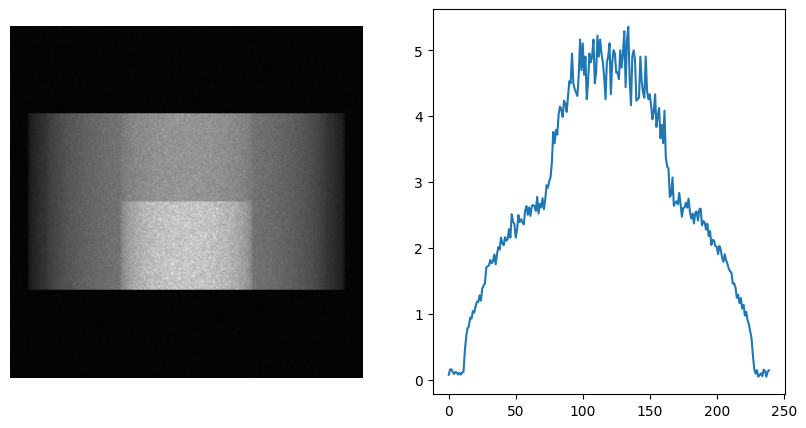

In [3]:
import Radiography_Library as RadLib

size = 60
log_factor = 0.0000001

x_shift = 0
y_shift = 0

save_as = ''
htmp_array, xlim, ylim = RadLib.Heatmap_from_Dask(x_data, y_data, size, log_factor, x_shift, y_shift, save_as)

## 5.1. Isolate Bone from Tissue

In [153]:
del dataframe_1, dataframe_2

In [152]:
directory = 'RESULTS/'
rootnames = ["RC40K100M", "RC80K100M"]

tree_name = "Photons"
x_branch  = "X_axis"
y_branch  = "Y_axis"

x_shift = 0.0
y_shift = -150

save_as = ''

size = 100
log_factor = 0.01

In [ ]:
from skimage.restoration import denoise_bilateral
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import plotly.graph_objects as go
import plotly.io as pio

try: dataframe_1
except NameError:
    dataframe_1 = root_to_dask(directory, rootnames[0], tree_name, x_branch, y_branch)
    dataframe_2 = root_to_dask(directory, rootnames[1], tree_name, x_branch, y_branch)
    print("Dataframes created")

x_1 = dataframe_1[x_branch].to_dask_array(lengths=True)
y_1 = dataframe_1[y_branch].to_dask_array(lengths=True)

x_2 = dataframe_2[x_branch].to_dask_array(lengths=True)
y_2 = dataframe_2[y_branch].to_dask_array(lengths=True)

htmp_array_1, xlim, ylim = heatmap_array_dask(x_1, y_1, size, log_factor, x_shift, y_shift, '')
htmp_array_2, xlim, ylim = heatmap_array_dask(x_2, y_2, size, log_factor, x_shift, y_shift, '')

low_energy_img  = htmp_array_1
high_energy_img = htmp_array_2
# low_energy_img  = (low_energy_img * 255).astype(np.uint8)
# high_energy_img = (high_energy_img * 255).astype(np.uint8)

plt.close()
plt.close()

In [ ]:
U_b_l = 0.7519 # mu1
U_b_h = 0.3012 # mu2
U_t_l = 0.26 # mu3
U_t_h = 0.18 # mu4

sls_bone = ( (U_t_h/U_t_l) * low_energy_img) - high_energy_img
sls_tissue = high_energy_img - ( low_energy_img * (U_b_h/U_b_l) )

sigma = 10
high_energy_filter = gaussian_filter(high_energy_img, sigma = sigma)
ssh_bone = ( (U_t_h/U_t_l) * low_energy_img) - high_energy_filter
ssh_tissue = high_energy_filter - ( low_energy_img * (U_b_h/U_b_l) )

sigma = 100
wn = 1
tissue_filter = 1 - (gaussian_filter(ssh_tissue, sigma = sigma) * wn)
acnr_bone = ssh_bone - (tissue_filter)
# acnr_bone[acnr_bone < 0.0] = 0

fig, ax = plt.subplots(1, 4, figsize=(12, 6))
img1 = ax[0].imshow(low_energy_img, cmap='gray')
ax[0].set_title("Low Energy")
img2 = ax[1].imshow(high_energy_img, cmap='gray')
ax[1].set_title("High Energy")
img7 = ax[2].imshow(ssh_bone, cmap='gray')
ax[2].set_title("Bone [SSH]")
img8 = ax[3].imshow(acnr_bone, cmap='gray')
ax[3].set_title("Bone [ACNR + SSH]")
plt.tight_layout()
if save_as != '': plt.savefig('Results/' + save_as + '.png', bbox_inches = 'tight', dpi = 900)
plt.show()

# ACNR 2____________
# w = U_t_h / U_t_l
# wc = U_b_h / U_b_l
# wn = 0.1
# sigma = 15
# low  = - (wn * wc * gaussian_filter(low_energy_img, sigma = sigma) ) + (w * low_energy_img)
# high = - high_energy_img + ( wn * gaussian_filter(high_energy_img, sigma = sigma))
# acnr2 = low + high

## 5.2. Bone Mineral Density (BMD)

In [ ]:
Thick_cons_bone = (U_t_l) / ( (U_t_h * U_b_l) - (U_t_l * U_b_h) )
thickness_bone = Thick_cons_bone * sls_bone
Thick_cons_tissue = (U_t_l) / ( (U_t_l * U_b_h) - (U_t_h * U_b_l) )
thickness_tissue = Thick_cons_tissue * sls_tissue

fig = go.Figure(go.Heatmap(z = thickness_bone, x = xlim, y = ylim))
fig.update_layout(width = 400, height = 400, xaxis = dict(autorange = 'reversed'), yaxis = dict(autorange = 'reversed'))    
# fig.show()

plt.figure(figsize = (12, 3))
plt.subplot(1, 3, 1)
plt.imshow(thickness_bone)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.plot(thickness_bone[120,:])
plt.subplot(1, 3, 3)
plt.plot(thickness_bone[:,120])
plt.show()

## 6.1. Calculate Interactive CNR

In [12]:
from PIL import Image
import Radiography_Library as RadLib

directory = 'RESULTS/'
image = '40k_double_100M' + '.png'
image = Image.open(directory + image)
image = image.convert('L')

# cropped_image = image.crop((1000, 1300, image.width - 1000, image.width - 1300))
cropped_image = image
plt.imshow(cropped_image)

In [ ]:
RadLib.Interactive_CNR(cropped_image)

## 6.2. Calculate Fixed CNR 

In [ ]:
import Radiography_Library as RadLib

image_path = "RESULTS/" + "a" + ".png"
save_as = ''

shftx_s = 0.0 # shift x-coordinate signal box
shfty_s = 0.0 
shftx_b = 200.0 # shift x-coordinate background box
shfty_b = 0.0

coords_signal  = [1200 + shftx_s, 1000 + shfty_s, 1800 + shftx_s, 1800 + shfty_s] # x1, y1, x2, y2
coords_bckgrnd = [2100 + shftx_b, 1000 + shfty_b, 2300 + shftx_b, 1800 + shfty_b] # x1, y1, x2, y2

RadLib.Fixed_CNR(image_path, save_as, coords_signal, coords_bckgrnd)

## 7. Denoise with Skimage.Denoise_Bilateral

In [ ]:
import Radiography_Library as RadLib

# load array
array_name = bone
array = True

# or load image
directory = 'RESULTS/'
image_name = 'bone2' + '.png'
image = False

RadLib.Denoise_EdgeDetection(array_name, array, image_name, image)

## 8. Save Plotly Heatmap

In [ ]:
import Radiography_Library as RadLib

# array = htmp_array
array = denoised_image
# array = fft_image
# array = bone
# array = tissue

title   = r"$ \large{ \text{Denoised Isolated Bone, DEXA: 40, 80 keV, 250M Beams} } $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

annotation = 'CNR = 9.1' 

width  = 800
height = 800

save_as = ''

RadLib.Plotly_Heatmap(array, xlim, ylim, title, x_label, y_label, annotation, width, height, save_as)